In [1]:
# Install dan import package yang diperlukan
!pip install gdown
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split

# Unduh dataset dari Google Drive
url = 'https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK'
output_file = 'dataset.csv'
gdown.download(url, output_file, quiet=False)

# 1. Baca dataset
data = pd.read_csv(output_file)

# 2. Bersihkan data: hilangkan baris kosong & rapikan string
data.dropna(inplace=True)
for kolom in data.select_dtypes(include='object').columns:
    data[kolom] = data[kolom].apply(lambda x: x.strip())

# 3. Pisahkan fitur (X) dan target (y)
target_col = data.columns[0]
X = data.drop(columns=target_col)
y = data[target_col].astype(int)

# 4. Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=a95972c2-2c99-4124-b866-ca0a49caf410
To: /content/dataset.csv
100%|██████████| 443M/443M [00:04<00:00, 104MB/s]


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include=['int','float']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, regularizers

# Fungsi untuk membangun model
def create_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # Hidden layer 1
    x = layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Hidden layer 2
    x = layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l1(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Output layer
    outputs = layers.Dense(1)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Inisialisasi model
model = create_model(X_train_proc.shape[1])

# Optimizer dengan schedule learning rate
cosine_decay = optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=1000
)

# Compile model
model.compile(
    optimizer=optimizers.Adam(learning_rate=cosine_decay),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Callback untuk early stopping
early_stopping_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training model
history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_cb],
    verbose=2
)


Epoch 1/100
10307/10307 - 39s - 4ms/step - loss: 1582261.3750 - mean_absolute_error: 1075.1145 - val_loss: 642.3272 - val_mean_absolute_error: 21.8496
Epoch 2/100
10307/10307 - 32s - 3ms/step - loss: 27112.0039 - mean_absolute_error: 131.4446 - val_loss: 324.8039 - val_mean_absolute_error: 15.9522
Epoch 3/100
10307/10307 - 42s - 4ms/step - loss: 26628.9062 - mean_absolute_error: 130.0062 - val_loss: 278.4306 - val_mean_absolute_error: 15.2344
Epoch 4/100
10307/10307 - 29s - 3ms/step - loss: 26570.3340 - mean_absolute_error: 130.0452 - val_loss: 210.0049 - val_mean_absolute_error: 12.9583
Epoch 5/100
10307/10307 - 28s - 3ms/step - loss: 26459.0801 - mean_absolute_error: 129.6320 - val_loss: 271.8734 - val_mean_absolute_error: 15.0926
Epoch 6/100
10307/10307 - 42s - 4ms/step - loss: 26389.0566 - mean_absolute_error: 129.4600 - val_loss: 289.2820 - val_mean_absolute_error: 15.6366
Epoch 7/100
10307/10307 - 41s - 4ms/step - loss: 26193.4277 - mean_absolute_error: 129.0066 - val_loss: 160.3

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, regularizers

# Fungsi untuk membangun model
def create_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # Hidden layer 1
    x = layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Hidden layer 2
    x = layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l1(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Output layer
    outputs = layers.Dense(1)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Inisialisasi model TensorFlow, beri nama 'tf_model'
tf_model = create_model(X_train_proc.shape[1])

# Optimizer dengan schedule learning rate
cosine_decay = optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=1000
)

# Compile model TensorFlow
tf_model.compile(
    optimizer=optimizers.Adam(learning_rate=cosine_decay),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Callback untuk early stopping
early_stopping_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training model TensorFlow
# Ubah model.fit menjadi tf_model.fit
history = tf_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_cb],
    verbose=2
)


Epoch 1/100
10307/10307 - 37s - 4ms/step - loss: 1581761.2500 - mean_absolute_error: 1074.8647 - val_loss: 587.5608 - val_mean_absolute_error: 21.4621
Epoch 2/100


KeyboardInterrupt: 

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# Definisi arsitektur MLP
class MyMLP(nn.Module):
    def __init__(self, input_dim):
        super(MyMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inisialisasi model PyTorch, beri nama 'pt_model'
pt_model = MyMLP(X_train_proc.shape[1]).to(device)

# Loss, optimizer, dan scheduler
loss_fn = nn.MSELoss()
optimizer = optim.AdamW(pt_model.parameters(), lr=1e-3, weight_decay=1e-4) # Ubah model.parameters() ke pt_model.parameters()
lr_scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10)

# Dataset dan DataLoader
train_dataset = TensorDataset(
    torch.tensor(X_train_proc, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
)
val_dataset = TensorDataset(
    torch.tensor(X_test_proc, dtype=torch.float32),
    torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop dengan early stopping
best_loss = float('inf')
patience = 10
early_stop_counter = 0

for epoch in range(10):
    pt_model.train() # Ubah model.train() ke pt_model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = pt_model(xb) # Ubah model(xb) ke pt_model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()

    lr_scheduler.step()

    # Validation
    pt_model.eval() # Ubah model.eval() ke pt_model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_preds = pt_model(xb) # Ubah model(xb) ke pt_model(xb)
            batch_loss = loss_fn(val_preds, yb).item()
            total_val_loss += batch_loss

    avg_val_loss = total_val_loss / len(val_loader)

    # Cek early stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        torch.save(pt_model.state_dict(), 'best_model.pth') # Ubah model.state_dict() ke pt_model.state_dict()
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[TensorFlow] MSE = 400.5792 | RMSE = 20.0145 | R² = -2.3751
[PyTorch] MSE = 174.8263 | RMSE = 13.2222 | R² = -0.4730


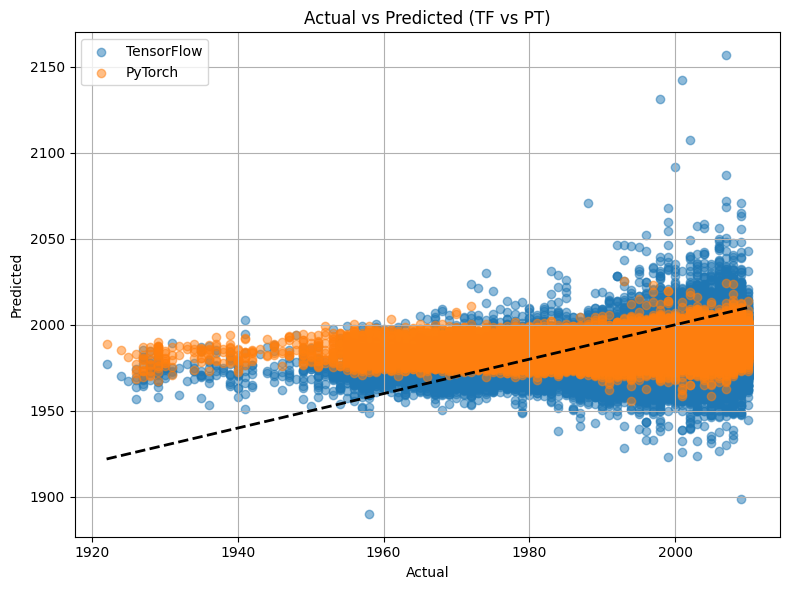

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import torch # Pastikan torch diimpor

# Asumsi bahwa model TensorFlow disimpan di variabel 'tf_model'
# dan model PyTorch disimpan di variabel 'pt_model' dari sel sebelumnya.
# Jika tidak, Anda perlu menyesuaikan penamaan variabel.

# Prediksi dari model TensorFlow
# Ganti 'model' dengan nama variabel model TensorFlow Anda, misalnya 'tf_model'
y_pred_tf = tf_model.predict(X_test_proc).flatten()

# Load model PyTorch terbaik
# Pastikan variabel model PyTorch Anda benar, misalnya 'pt_model'
pt_model.load_state_dict(torch.load('best_model.pth'))
pt_model.eval()

# Prediksi dari model PyTorch
with torch.no_grad():
    # Ganti 'model' dengan nama variabel model PyTorch Anda, misalnya 'pt_model'
    y_pred_pt = pt_model(torch.tensor(X_test_proc, dtype=torch.float32).to(device))
    y_pred_pt = y_pred_pt.cpu().numpy().flatten()

# Evaluasi performa kedua model
# Gunakan y_pred_tf dan y_pred_pt yang sudah benar
for label, y_pred in [('TensorFlow', y_pred_tf), ('PyTorch', y_pred_pt)]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'[{label}] MSE = {mse:.4f} | RMSE = {rmse:.4f} | R² = {r2:.4f}')

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tf, alpha=0.5, label='TensorFlow')
plt.scatter(y_test, y_pred_pt, alpha=0.5, label='PyTorch')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', linewidth=2
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted (TF vs PT)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Teori**

1.   Menghapus data missing.
2.   Menormalisasi data numerik menggunakan StandardScaler:
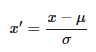


3. Data kategorikal dikodekan menggunakan OneHotEncoder, yaitu mengubah setiap nilai kategori menjadi representasi biner.

4. Tensorflow:
Input Layer
Dense(128) + ReLU + BatchNorm + Dropout(0.3)
Dense(64) + ReLU + BatchNorm + Dropout(0.3)
Output Layer (Dense(1))
Menggunakan fungsi loss MSE (Mean Squared Error):
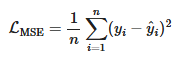

Regularisasi yang digunakan:

L2 Regularization di layer pertama:
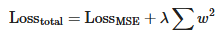

L1 Regularization di layer kedua:
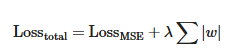